# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [5]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
df = pd.read_csv('/content/Traffic Data.csv')
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [8]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


In [9]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


<Axes: xlabel='date_time'>

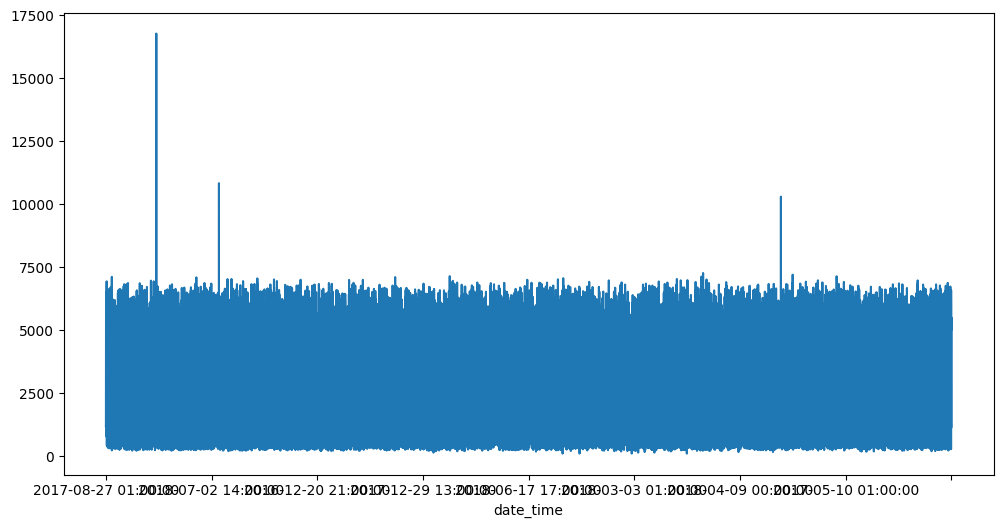

In [10]:
df.set_index('date_time', inplace=True)
plt.figure(figsize=(12,6))
df['traffic_volume'].plot()

In [11]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear
...,...,...,...,...,...,...,...
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [13]:
df.reset_index(inplace=True)

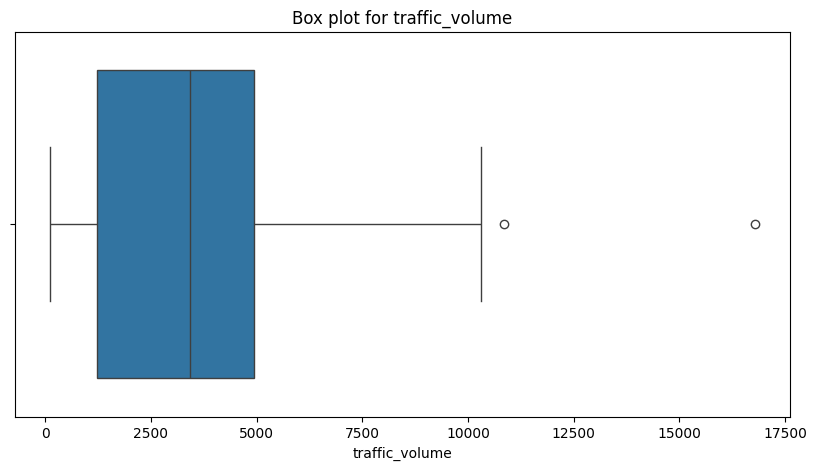

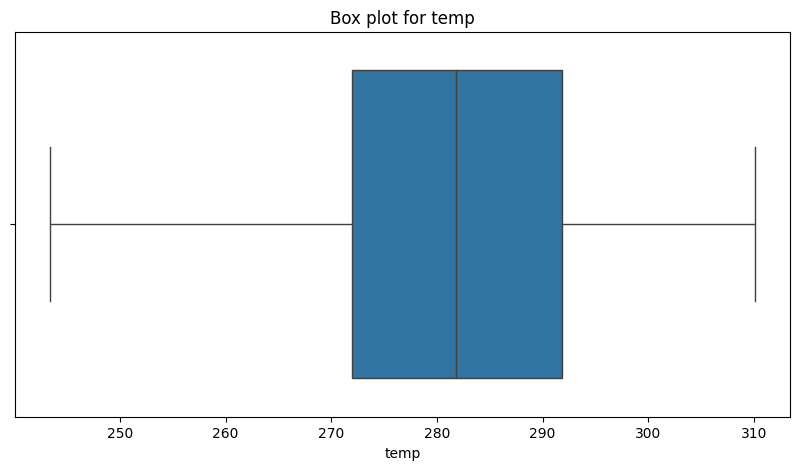

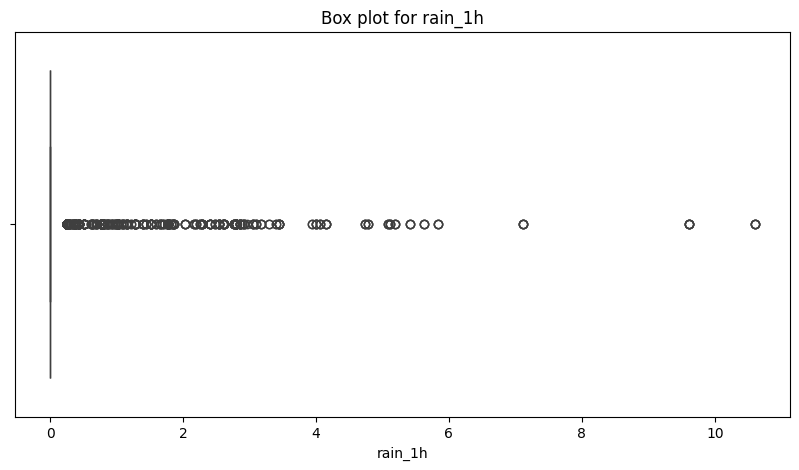

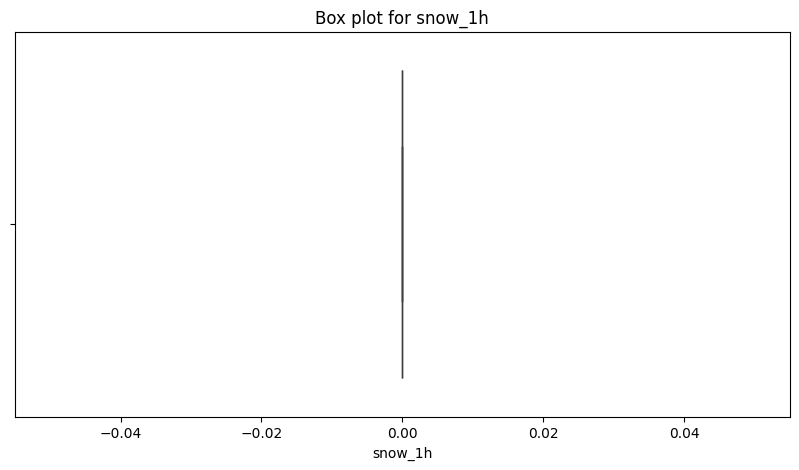

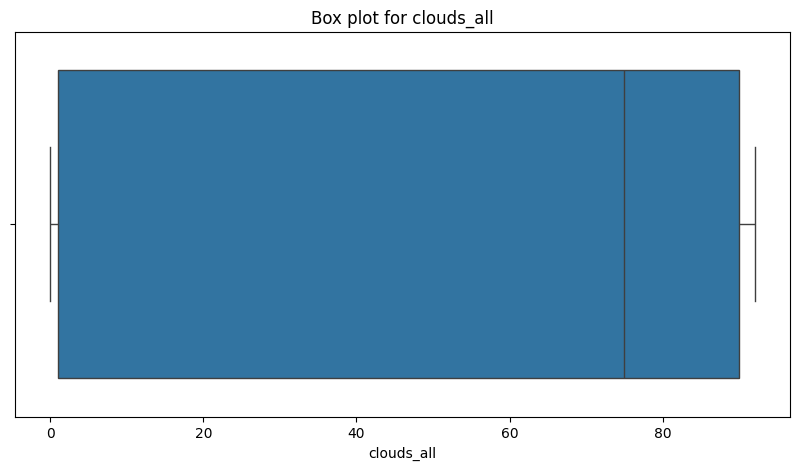

In [14]:
# Use to detect outliers
for column in df.select_dtypes(include=['float64','int64']):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

In [15]:
df.isna().sum()

,0
date_time,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


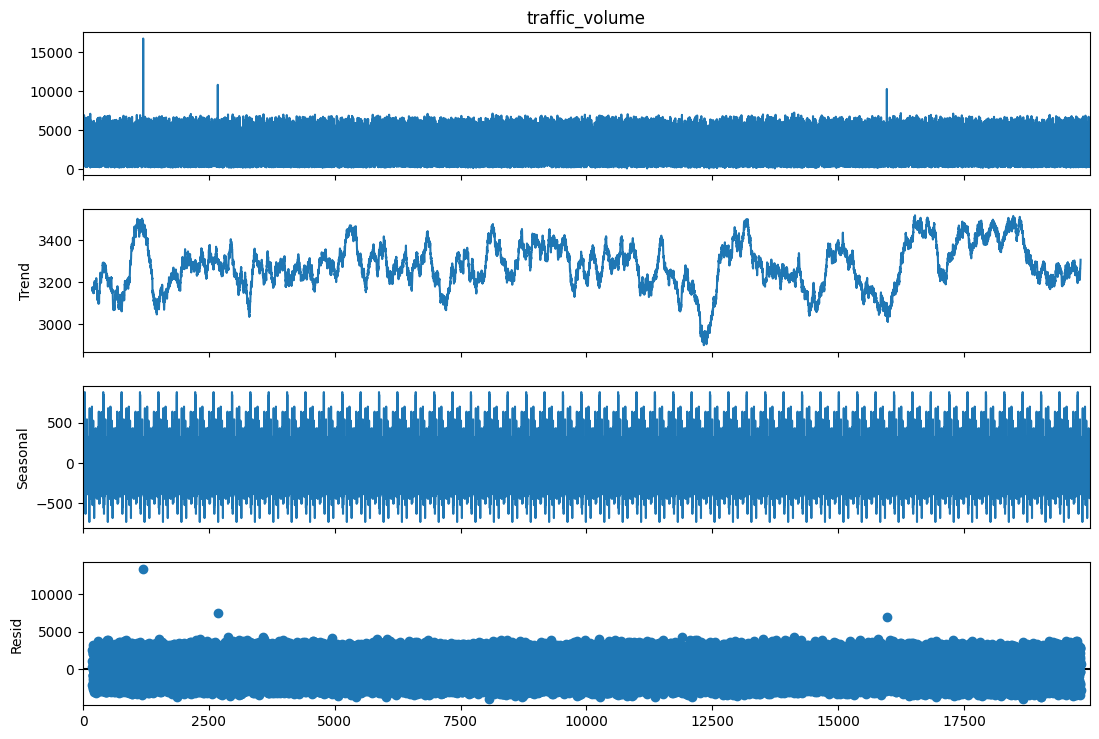

In [16]:
decomposition = seasonal_decompose(df['traffic_volume'].dropna(), model='additive', period=365)
decomposition_plot = decomposition.plot()
decomposition_plot.set_size_inches(12,8)
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [17]:
df.duplicated().sum()

12

In [18]:
df = df.drop_duplicates()

In [19]:
# fille is the null
df['traffic_volume'].fillna(df['traffic_volume'].mean(), inplace=True)

<ipython-input-19-a84a843b14da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume'].fillna(df['traffic_volume'].mean(), inplace=True)


In [20]:
#clean of outlier
numerical_cols = df.select_dtypes(include=['float64','int64']).columns

before_size = df.shape[0]

for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print(f"Before filtering size: {before_size}")
print(f"Filtered size: {df.shape[0]}")

Before filtering size: 19988
Filtered size: 19273


In [21]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19273 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            19273 non-null  datetime64[ns]
 1   traffic_volume       19273 non-null  float64       
 2   temp                 19273 non-null  float64       
 3   rain_1h              19273 non-null  float64       
 4   snow_1h              19273 non-null  float64       
 5   clouds_all           19273 non-null  int64         
 6   weather_main         19273 non-null  object        
 7   weather_description  19273 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.3+ MB


In [23]:
df.set_index('date_time', inplace=True)

In [24]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear
...,...,...,...,...,...,...,...
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear


In [25]:
df.sort_index(inplace=True)

In [26]:
# I Create lags (1,2)
df['Lag1'] = df['traffic_volume'].shift(1)
df['Lag2'] = df['traffic_volume'].shift(2)
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Lag1,Lag2
date_time,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,NaN,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4872.0,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4872.0,4872.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,4872.0,4872.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,5074.0,4872.0
...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,4132.0,4283.0
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,3543.0,4132.0
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2781.0,3543.0


In [27]:
#I Create moving average
df['MA7'] = df['traffic_volume'].rolling(window=7).mean()

In [28]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Lag1,Lag2,MA7
date_time,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,NaN,NaN,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4872.0,NaN,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4872.0,4872.0,NaN
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,4872.0,4872.0,NaN
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,5074.0,4872.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,4132.0,4283.0,4188.857143
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,3543.0,4132.0,3960.428571
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2781.0,3543.0,3643.142857


In [29]:
df['Lag1'].fillna(df['Lag1'].mode()[0], inplace=True)
df['Lag2'].fillna(df['Lag2'].mode()[0], inplace=True)
df['MA7'].fillna(df['MA7'].mode()[0], inplace=True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [30]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

df['Day_of_Week'] = df.index.dayofweek
df['Month'] = df.index.month
df['Day_of_Year'] = df.index.dayofyear
df['IsWeekend'] = df['Day_of_Week'] >= 5

In [31]:
df['prev_traffic_volume'].fillna(df['prev_traffic_volume'].mode()[0], inplace=True)

In [32]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Lag1,Lag2,MA7,prev_traffic_volume,Day_of_Week,Month,Day_of_Year,IsWeekend
date_time,,,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,353.0,353.0,4686.714286,353.0,4,11,323,False
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4872.0,353.0,4686.714286,4872.0,4,11,323,False
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4872.0,4872.0,4686.714286,4872.0,4,11,323,False
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,4872.0,4872.0,4686.714286,4872.0,4,11,323,False
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,5074.0,4872.0,4686.714286,5074.0,4,11,323,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,4132.0,4283.0,4188.857143,4132.0,6,9,273,True
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,3543.0,4132.0,3960.428571,3543.0,6,9,273,True
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2781.0,3543.0,3643.142857,2781.0,6,9,273,True


In [33]:
labe = LabelEncoder()
df['Day_of_Week'] = labe.fit_transform(df['Day_of_Week'])

In [34]:
lable_weather= LabelEncoder()
df['weather_description'] = lable_weather.fit_transform(df['weather_description'])

In [35]:
weather_main = LabelEncoder()
df['weather_main'] = lable_weather.fit_transform(df['weather_main'])

In [36]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Lag1,Lag2,MA7,prev_traffic_volume,Day_of_Week,Month,Day_of_Year,IsWeekend
date_time,,,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3,4,353.0,353.0,4686.714286,353.0,4,11,323,False
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,5,16,4872.0,353.0,4686.714286,4872.0,4,11,323,False
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,8,9,4872.0,4872.0,4686.714286,4872.0,4,11,323,False
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,5,16,4872.0,4872.0,4686.714286,4872.0,4,11,323,False
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3,4,5074.0,4872.0,4686.714286,5074.0,4,11,323,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,1,1,4132.0,4283.0,4188.857143,4132.0,6,9,273,True
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,1,18,3543.0,4132.0,3960.428571,3543.0,6,9,273,True
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,9,20,2781.0,3543.0,3643.142857,2781.0,6,9,273,True


In [37]:
df['IsWeekend'] = df['IsWeekend'].astype(int)

In [38]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Lag1,Lag2,MA7,prev_traffic_volume,Day_of_Week,Month,Day_of_Year,IsWeekend
date_time,,,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3,4,353.0,353.0,4686.714286,353.0,4,11,323,0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,5,16,4872.0,353.0,4686.714286,4872.0,4,11,323,0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,8,9,4872.0,4872.0,4686.714286,4872.0,4,11,323,0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,5,16,4872.0,4872.0,4686.714286,4872.0,4,11,323,0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3,4,5074.0,4872.0,4686.714286,5074.0,4,11,323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,1,1,4132.0,4283.0,4188.857143,4132.0,6,9,273,1
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,1,18,3543.0,4132.0,3960.428571,3543.0,6,9,273,1
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,9,20,2781.0,3543.0,3643.142857,2781.0,6,9,273,1


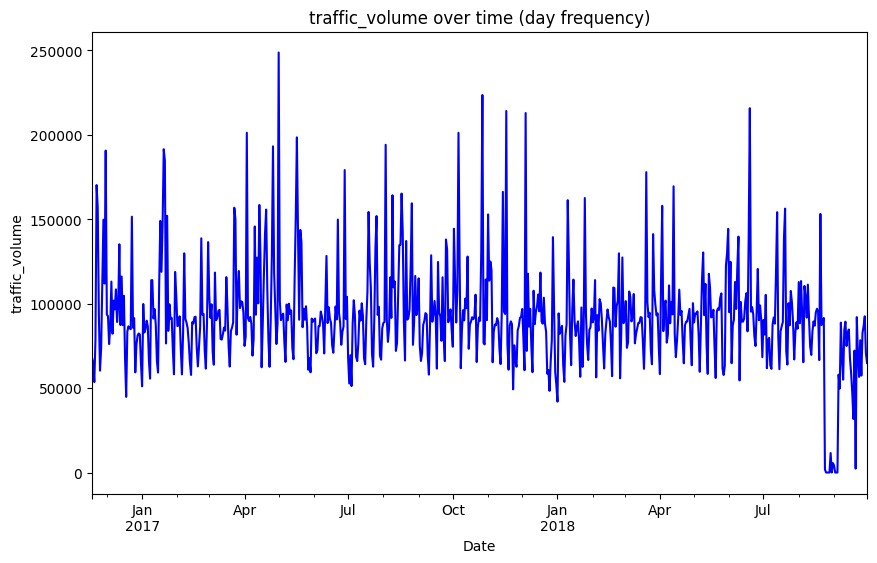

In [43]:
traffic_volume= df['traffic_volume'].resample('D').sum()

plt.figure(figsize=(10, 6))
traffic_volume.plot(color='blue')
plt.title('traffic_volume over time (day frequency)')
plt.xlabel('Date')
plt.ylabel('traffic_volume')
plt.show()

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [44]:
print(f"Min date in data: {df.index.min()}")
print(f"Max date in data: {df.index.max()}")

Min date in data: 2016-11-18 15:00:00
Max date in data: 2018-09-30 23:00:00


In [45]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = df[['traffic_volume']]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60

X, y = create_sequences(scaled_data, seq_length)

X = X.reshape((X.shape[0], X.shape[1], 1))

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [47]:
print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training data shape: X_train=(15370, 60, 1), y_train=(15370,)
Testing data shape: X_test=(3843, 60, 1), y_test=(3843,)


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [ ]:
#I create with Train-Test Split

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [49]:
regressor = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),

    LSTM(units=50, return_sequences=True),
    Dropout(0.2),

    LSTM(units=50),
    Dropout(0.2),

    Dense(units=1)
])

regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 53s 101ms/step - loss: 0.0302
Epoch 2/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 46s 95ms/step - loss: 0.0085
Epoch 3/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 44s 92ms/step - loss: 0.0048
Epoch 4/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 44s 91ms/step - loss: 0.0041
Epoch 5/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 45s 94ms/step - loss: 0.0039
Epoch 6/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - loss: 0.0035
Epoch 7/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 84s 97ms/step - loss: 0.0034
Epoch 8/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 79s 92ms/step - loss: 0.0033
Epoch 9/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - loss: 0.0032
Epoch 10/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - loss: 0.0029


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [50]:
prediction_lstm = regressor.predict(X_test)

121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

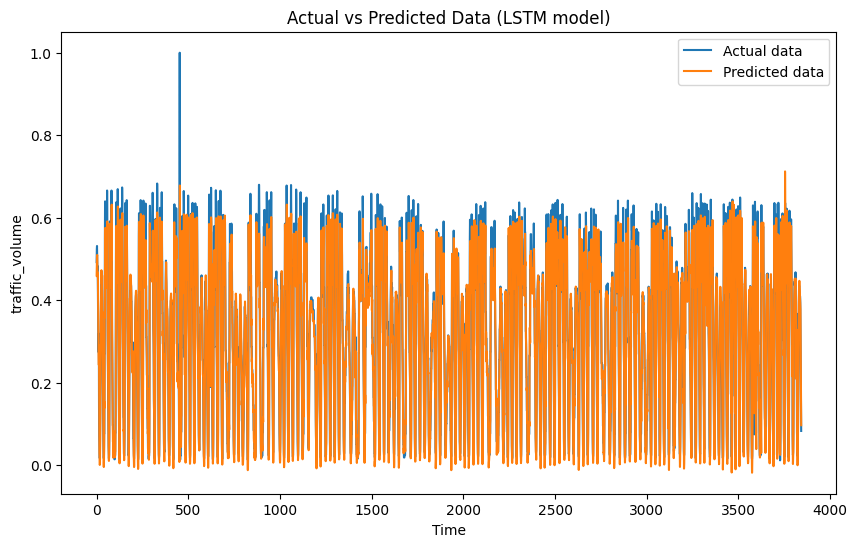

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual data')
plt.plot(prediction_lstm, label='Predicted data')
plt.title('Actual vs Predicted Data (LSTM model)')
plt.xlabel('Time')
plt.ylabel('traffic_volume')
plt.legend()
plt.show()

In [57]:
rmse = mean_squared_error(y_test, prediction_lstm)
print(f"Mean Squared Error (MSE): {rmse:.2f}")

rmse = mean_squared_error(y_test, prediction_lstm, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
mape = mean_absolute_percentage_error(y_test,prediction_lstm)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06
Root Mean Squared Error (RMSE): 0.06


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [53]:
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


481/481 ━━━━━━━━━━━━━━━━━━━━ 44s 83ms/step - loss: 0.0164 - val_loss: 0.0047
Epoch 2/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - loss: 0.0040 - val_loss: 0.0044
Epoch 3/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - loss: 0.0034 - val_loss: 0.0041
Epoch 4/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 39s 81ms/step - loss: 0.0031 - val_loss: 0.0041
Epoch 5/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 6/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 39s 81ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 7/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - loss: 0.0027 - val_loss: 0.0038
Epoch 8/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 9/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 40s 82ms/step - loss: 0.0026 - val_loss: 0.0033
Epoch 10/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 44s 88ms/step - loss: 0.0024 - val_loss: 0.0034


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [54]:
prediction_gru = model.predict(X_test)

prediction_gru = scaler.inverse_transform(prediction_gru.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

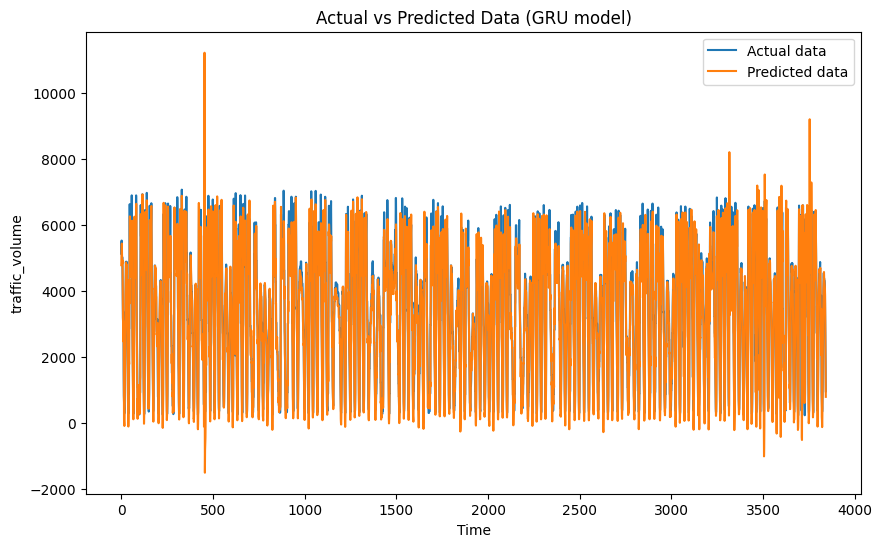

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual data')
plt.plot(prediction_gru, label='Predicted data')
plt.title('Actual vs Predicted Data (GRU model)')
plt.xlabel('Time')
plt.ylabel('traffic_volume')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mse = mean_squared_error(y_test_actual, prediction_gru)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_actual, prediction_gru)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}')


MSE: 348680.95
RMSE: 590.49
MAPE: 0.22


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

I used MinMaxScaler for the traffic_volume column to scale the data [0,1].  

I also used tags and moving avrege in processing.

I used feature engineering such as day, month, day of year, isweekend, filled in the empty values ​​and deleted duplicate ones.

 I chose the GRU model and also LSTM, so I calculated MSE and RMSE. and MAPE

I adjusted parameters such as the number of units in the GRU and LSTM layers, and optimized the model structure to achieve better performance.

Comparison:

LSTM shows significantly better performance compared to GRU, as the MSE and RMSE value of LSTM are much lower than GRU, indicating higher prediction accuracy.
GRU has a MAPE of 0.22, which reflects a higher error rate in predictions compared to LSTM.